In [49]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
import image_shapes as shapes
from skimage import io
from sklearn.decomposition import PCA

In [50]:
image = io.imread('/Users/erb/Desktop/CS/PigmentSpotting/images/ROI_3.png')
mask = shapes.get_petal_shape(image)
x,y,z = image.shape
mat = image.reshape([x*y,z])
filter_array = mask.reshape([x*y])
pointlist = mat[filter_array > 0]
mean, eigenvectors = cv2.PCACompute(pointlist, mean=None)
axis = eigenvectors[0,:].reshape([3])

In [51]:
newmat = np.dot(mat.astype(np.float32) - mean, axis)
newpoints = newmat[filter_array > 0]
rescale = np.interp(newmat, (np.min(newpoints), np.max(newpoints)), (0,255))
rescale = np.around(rescale).astype(np.uint8)
grey = rescale.reshape([x,y])
pigment = cv2.bitwise_and(grey, mask)

In [52]:
newpoints_IQR = newpoints
Q1, Q3 = np.percentile(newpoints_IQR, 25), np.percentile(newpoints_IQR,75)
iqr = Q3 - Q1

In [53]:
cut_off_val_IQR = iqr * 2
lower_bound_IQR, upper_bound_IQR = Q1 - cut_off_val_IQR, Q3 + cut_off_val_IQR
non_outliers_IQR = [x for x in newpoints if x >= lower_bound_IQR and x <= upper_bound_IQR]
print(min(non_outliers_IQR), max(non_outliers_IQR))

-31.227308 78.79736


(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000

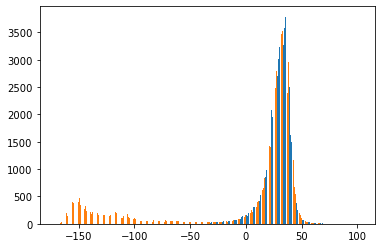

In [54]:
plt.hist([non_outliers_IQR, newpoints.ravel()], bins=255, density= False, histtype='bar')

(array([[4.000e+00, 1.000e+00, 8.000e+00, 1.400e+01, 1.900e+01, 3.300e+01,
         5.000e+01, 9.400e+01, 1.410e+02, 1.810e+02, 3.060e+02, 2.920e+02,
         2.850e+02, 3.900e+02, 4.480e+02, 3.420e+02, 4.740e+02, 4.480e+02,
         3.800e+02, 5.180e+02, 4.590e+02, 3.200e+02, 3.060e+02, 3.120e+02,
         2.710e+02, 2.830e+02, 2.620e+02, 2.360e+02, 2.000e+02, 2.020e+02,
         2.390e+02, 1.900e+02, 2.110e+02, 2.080e+02, 2.160e+02, 1.790e+02,
         1.520e+02, 1.940e+02, 1.610e+02, 1.800e+02, 1.550e+02, 1.950e+02,
         1.650e+02, 1.750e+02, 1.750e+02, 2.160e+02, 2.480e+02, 1.860e+02,
         1.560e+02, 2.010e+02, 1.520e+02, 1.230e+02, 1.220e+02, 1.520e+02,
         1.050e+02, 1.150e+02, 1.690e+02, 1.420e+02, 1.100e+02, 1.020e+02,
         1.090e+02, 1.090e+02, 8.100e+01, 7.600e+01, 1.000e+02, 6.500e+01,
         6.700e+01, 5.000e+01, 7.500e+01, 4.900e+01, 4.500e+01, 6.100e+01,
         5.500e+01, 5.600e+01, 3.800e+01, 5.000e+01, 6.000e+01, 4.800e+01,
         3.700e+01, 6.700

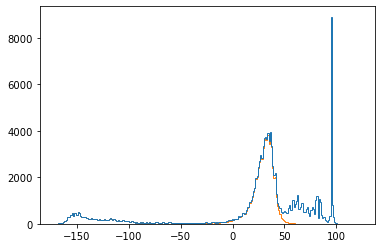

In [65]:
plt.hist([newmat.ravel(), newpoints.ravel()], bins = 255, density= False, histtype='step')

In [55]:
lower_outliers_IQR = [x for x in newpoints if x < lower_bound_IQR]
for i in range(len(lower_outliers_IQR)):
    lower_outliers_IQR[i] = min(non_outliers_IQR)
upper_outliers_IQR = [x for x in newpoints if x > upper_bound_IQR]
for i in range(len(upper_outliers_IQR)):
    upper_outliers_IQR[i] = max(non_outliers_IQR)
print(lower_outliers_IQR, upper_outliers_IQR)

.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227308, -31.227

In [56]:
newpoints_IQR = []
for i in range(len(lower_outliers_IQR)):
    newpoints_IQR.append(lower_outliers_IQR[i])
for i in range(len(non_outliers_IQR)):
    newpoints_IQR.append(non_outliers_IQR[i])
for i in range(len(upper_outliers_IQR)):
    newpoints_IQR.append(upper_outliers_IQR[i])
print(type(newpoints_IQR))
print(len(newpoints_IQR), newpoints.shape)


<class 'list'>
82162 (82162,)


In [57]:
newpoints_IQR = np.asarray(newpoints_IQR, dtype=np.float64)
rescale_1 = np.interp(newmat, (np.min(newpoints_IQR), np.max(newpoints_IQR)), (0,255))
rescale_1 = np.around(rescale_1).astype(np.uint8)
grey_1 = rescale_1.reshape([x,y])
pigment_1 = cv2.bitwise_and(grey_1, mask)

In [58]:
newpoints_S = newpoints
newpoints_S_Mean, newpoints_S_STD = np.mean(newpoints_S), np.std(newpoints_S)

In [59]:
cut_off_val_S = newpoints_S_STD * 2
lower_bound_S, upper_bound_S = newpoints_S_Mean - cut_off_val_S, newpoints_S_Mean + cut_off_val_S
non_outliers_S = [x for x in newpoints if x >= lower_bound_S and x <= upper_bound_S]
print(min(non_outliers_S), max(non_outliers_S))

-125.072754 101.94551


(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 1.170e+02, 1.870e+02, 1.410e+02, 1.610e+02, 1.800e+02,
         2.040e+02, 1.650e+02, 2.160e+02, 1.980e+02, 1.350e+02, 1.580e+02,
         1.740e+02, 1.090e+02, 1.030e+02, 1.340e+02, 9.400e+01, 1.050e+02,
         1.740e+02, 1.190e+02, 1.060e+02, 1.140e+02, 9.100e+01, 9.500e+01,
         1.000e+02, 8.100e+01, 6.600e+01, 8.600e+01, 6.700e+01, 5.900e+01,
         4.800e+01, 7.400e+01, 4.000e+01, 4.700e+01, 5.500e+01, 4.400e+01,
         5.400e+01, 5.000

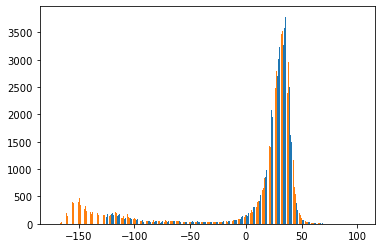

In [60]:
plt.hist([non_outliers_S, newpoints.ravel()], bins=255, density= False, histtype='bar')

In [61]:
lower_outliers_S = [x for x in newpoints if x < lower_bound_S]
for i in range(len(lower_outliers_S)):
    lower_outliers_S[i] = min(non_outliers_S)
upper_outliers_S = [x for x in newpoints if x > upper_bound_S]
for i in range(len(upper_outliers_S)):
    upper_outliers_S[i] = max(non_outliers_S)
print(lower_outliers_S, upper_outliers_S)

4, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.072754, -125.0727

In [62]:
newpoints_S = []
for i in range(len(lower_outliers_S)):
    newpoints_S.append(lower_outliers_S[i])
for i in range(len(non_outliers_S)):
    newpoints_S.append(non_outliers_S[i])
for i in range(len(upper_outliers_S)):
    newpoints_S.append(upper_outliers_S[i])
print(type(newpoints_S))
print(len(newpoints_S), newpoints.shape)

<class 'list'>
82162 (82162,)


In [63]:
newpoints_S= np.asarray(newpoints_S, dtype=np.float64)
rescale_2 = np.interp(newmat, (np.min(newpoints_S), np.max(newpoints_S)), (0,255))
rescale_2 = np.around(rescale_2).astype(np.uint8)
grey_2 = rescale_2.reshape([x,y])
pigment_2 = cv2.bitwise_and(grey_2, mask)


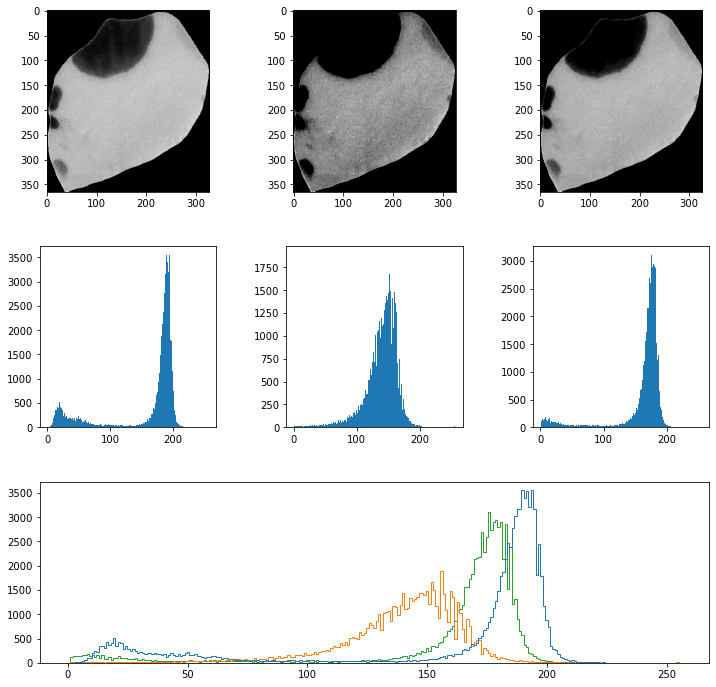

In [64]:
grid = plt.GridSpec(3,3,wspace=0.4, hspace=0.3)
fig = plt.figure(figsize=(12,12))
image_plot_1 = fig.add_subplot(grid[0,0])
image_plot_2 = fig.add_subplot(grid[0,1])
image_plot_3 = fig.add_subplot(grid[0,2])
image_plot_1.imshow(pigment, cmap='binary_r')
image_plot_2.imshow(pigment_1, cmap ='binary_r')
image_plot_3.imshow(pigment_2, cmap= 'binary_r')
histogram_1 = fig.add_subplot(grid[1,0])
histogram_2 = fig.add_subplot(grid[1,1])
histogram_3 = fig.add_subplot(grid[1,2])
histogram_1.hist(pigment.ravel(), bins =255, range = (1,255), histtype='bar')
histogram_2.hist(pigment_1.ravel(), bins = 255, range = (1,255), histtype='bar')
histogram_3.hist(pigment_2.ravel(), bins = 255, range = (1,255), histtype='bar')
big_hist = fig.add_subplot(grid[2,0:])
big_hist.hist([pigment.ravel(),pigment_1.ravel(),pigment_2.ravel()], bins = 255, range = (1,255), histtype = 'step')
fig.savefig('Different_Outliers.png')

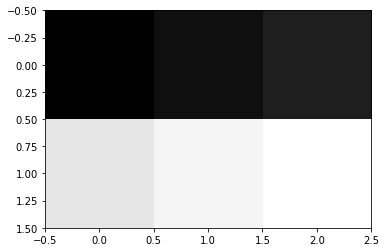

In [68]:
plt.imshow(np.asarray([[0,15,30],[230,245,255]],dtype = np.uint8), cmap = 'binary_r')

In [ ]:
data_mean, data_std = np.mean(newmat), np.std(newmat)
cut_off_val = data_std * 3
lower_bound, upper_bound = data_mean - cut_off_val, data_mean + cut_off_val
outliers = [x for x in newmat if x < lower_bound or x > upper_bound]
non_outliers = [x for x in newmat if x >= lower_bound and x<= upper_bound]

In [ ]:
plt.hist([newmat.ravel(), non_outliers], bins = 255, range = (1,255), histtype='bar')

In [ ]:
newmat[x < lower_bound] = np.min(newmat)
newmat[x > upper_bound] = np.max(newmat)
newpoints = newmat[filter_array > 0]

rescale = ((newmat - np.min(newpoints)) * 255.0 / (np.max(newpoints)-np.min(newpoints)))
rescale = np.around(rescale).astype(np.uint8)
grey = rescale.reshape([x,y])
pigment_4 = cv2.bitwise_and(grey, mask)

In [ ]:
plt.imshow(pigments_4, cmap = 'gist_gray')